<a href="https://colab.research.google.com/github/Sidb1308/googlemap-scrap-dentist-sentiment-analysis/blob/main/analyse_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




# Loading the file

In [3]:
df = pd.read_csv('/content/comment_dentist_Alsace.csv')

In [33]:
pd.set_option('display.max_row', 11111)
pd.set_option('display.max_column', 11111)

# EDA

In [4]:
df = df.drop(df.columns[2], axis=1)

In [5]:
df['star'] = df['star'].str.replace(r'(\d+(\.\d+)?) stars?', r'\1', regex=True)

In [6]:
df['name'] = pd.factorize(df['name'])[0]

In [7]:
df.rename(columns={'name': 'dentist_id'}, inplace=True)

In [8]:
df['review '] = df['review '].fillna('No comment')

In [9]:
count = df['star'].value_counts()

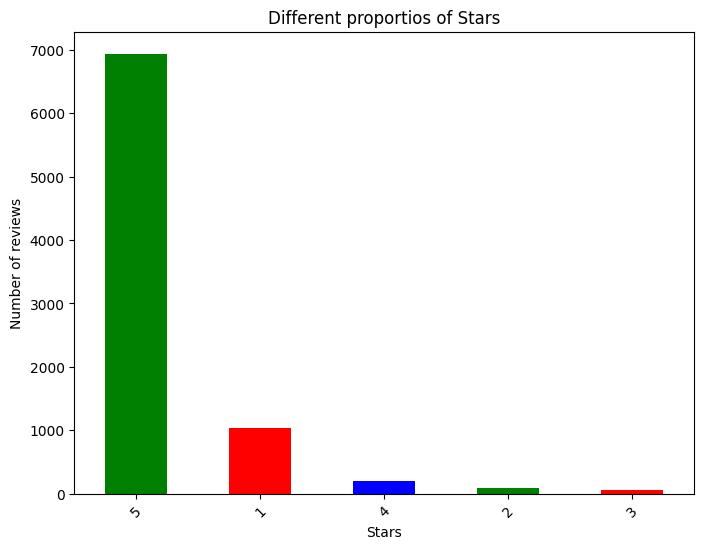

In [10]:
plt.figure(figsize=(8, 6))
count.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Different proportios of Stars")
plt.xlabel("Stars")
plt.ylabel("Number of reviews")
plt.xticks(rotation=45)
plt.show()

# Sentiment Analysis
We are using 'ac0hik/Sentiment_Analysis_French' a fine-tuned version of camembert-base on the tweet_sentiment_multilingual dataset (French portion of it)
It achieves the following results on the evaluation set:

Loss: 0.7877
Accuracy: 0.7654

In [11]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("ac0hik/Sentiment_Analysis_French")
model = TFAutoModelForSequenceClassification.from_pretrained("ac0hik/Sentiment_Analysis_French")
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer,max_length=500,truncation=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/374 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/922 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFCamembertForSequenceClassification.

All the weights of TFCamembertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [12]:
labels = []
scores = []

for i, comment in enumerate(df['review ']):
    try:
        result = nlp(comment)
        label = result[0]['label']
        score = result[0]['score']

        labels.append(label)
        scores.append(score)
    except Exception as e:
        print(f"Error occurred while processing comment {i}: {e}")

        # Facultatif : Afficher le commentaire spécifique qui a provoqué l'erreur
        print(f"Comment: {comment}")



In [13]:
df['label']= labels
df['score']=scores

# Proportion of the different sentiment

In [14]:
count_comments = df['label'].value_counts()

(array([0, 1, 2]),
 [Text(0, 0, 'positive'), Text(1, 0, 'neutral'), Text(2, 0, 'negative')])

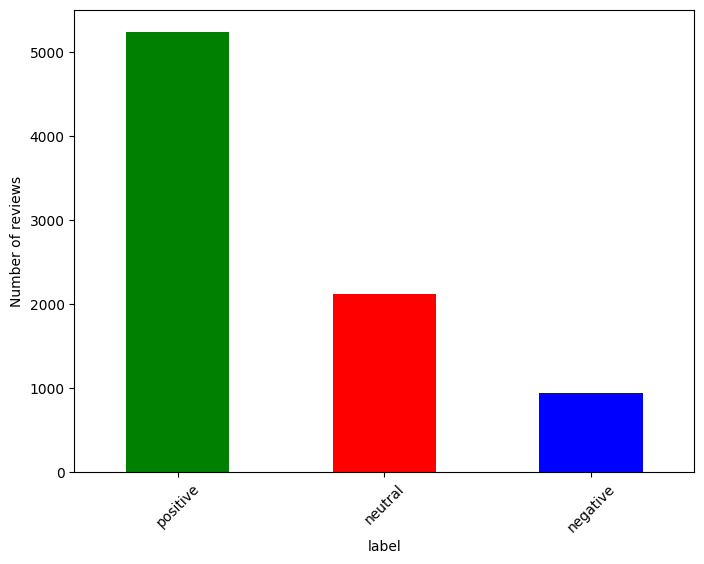

In [15]:
plt.figure(figsize=(8, 6))
count_comments.plot(kind='bar', color=['green', 'red', 'blue'])

plt.xlabel("label")
plt.ylabel("Number of reviews")
plt.xticks(rotation=45)

We see that we have a consequent number of neutral comment wich we didn't see in the previous star's plot, it is due to that their are revieuw with "no comment" in wich people doesn't comment and just rated the dentist

# Relationship between the reponse of the dentist to the comment and the positive rate in the comment

In [160]:
response = df.groupby(['dentist_id'])['response'].sum().reset_index(name='Total Response')

reponse1 = response.sort_values(by ='Total Response', ascending=False)

In [161]:
reponse1 = pd.DataFrame(reponse1)

In [162]:
label1 = df.drop(['star','review ','score','response'],axis=1)

In [163]:
pivot_df = label1.pivot_table(index='dentist_id', columns='label', aggfunc=len, fill_value=0)


In [164]:
pivot_df

label,negative,neutral,positive
dentist_id,,,
0,0,2,7
1,0,1,9
2,3,3,33
3,1,6,46
4,1,12,12
5,1,1,9
6,5,7,21
7,0,3,6
8,0,3,3


In [165]:
positive_rate = pd.DataFrame(pivot_df['positive']/pivot_df.sum(axis=1))


In [166]:
merged_df = pd.merge(reponse1, positive_rate, on='dentist_id', sort=False)

In [168]:
merged_df = merged_df.rename(columns={0: 'Positive Rate'})

In [171]:
 merged_df.columns

Index(['dentist_id', 'Total Response', 'Positive Rate'], dtype='object')

In [172]:
correlation = merged_df['Total Response'].corr(merged_df['Positive Rate'])

In [173]:
correlation

0.14213583714314218

There is no linear relationship between the response rate to the comment and the positive comment